In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
from scipy import stats, interpolate
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})

In [2]:
df = pd.read_csv("Diem.csv")

In [3]:
df.sample(10)

,Mã SV,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ
207,208,8.53,0.67,10,3,Nam,Khác,1,28,3.14,0,2.57
687,688,6.01,0.72,373,264,Nam,Kinh,1,1,1.88,1,4.00
129,130,5.94,1.02,179,153,Nam,Kinh,1,0,2.40,0,0.00
405,406,5.31,0.81,165,86,Nam,Khác,1,1,1.43,1,4.00
213,214,5.10,0.59,260,116,Nam,Khác,1,35,1.00,0,2.65
520,521,6.50,0.98,229,38,Nam,Khác,2,18,2.46,1,2.66
527,528,6.85,0.78,240,120,Nam,Kinh,1,28,2.00,0,2.10
667,668,6.92,0.98,425,30,Nữ,Kinh,1,0,3.65,0,0.00
300,301,7.48,0.81,485,74,Nữ,Kinh,2,48,2.94,0,2.25
474,475,6.99,0.89,20,11,Nam,Kinh,2,14,2.00,1,2.42


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mã SV             731 non-null    int64  
 1   Điểm TBTN         731 non-null    float64
 2   Tỉ lệ Văn/Toán    731 non-null    float64
 3   Tổng HS           731 non-null    int64  
 4   Hạng PT           731 non-null    int64  
 5   Giới tính         731 non-null    object 
 6   Dân tộc           731 non-null    object 
 7   Học kỳ            731 non-null    int64  
 8   Thời gian tự học  731 non-null    int64  
 9   Điểm giữa kỳ      731 non-null    float64
 10  Thể thao          731 non-null    int64  
 11  Điểm cuối kỳ      731 non-null    float64
dtypes: float64(4), int64(6), object(2)
memory usage: 68.7+ KB


## Câu 1: Tính giá trị trung bình , phương sai và độ lệch chuẩn của các biến định lượng

## Hàm tính phương sai

In [5]:
def phuong_sai(data):
    p_s = np.var(data)
    return p_s

In [6]:
print("Phương sai của Điểm TBTN =", phuong_sai(df['Điểm TBTN']))
print("Phương sai củaTỉ lệ Văn/Toán =", phuong_sai(df['Tỉ lệ Văn/Toán']))
print("Phương sai của Điểm giữa kỳ =", phuong_sai(df['Điểm giữa kỳ']))
print("Phương sai của Điểm cuối kỳ =", phuong_sai(df['Điểm cuối kỳ']))

Phương sai của Điểm TBTN = 1.3807782809748494
Phương sai củaTỉ lệ Văn/Toán = 0.02356449553766092
Phương sai của Điểm giữa kỳ = 0.5740173796366133
Phương sai của Điểm cuối kỳ = 0.9793022031922254


## Hàm tính độ lệch chuẩn

In [7]:
def do_lech_chuan(data):
    d_l_c = np.std(data, ddof = 1)
    return d_l_c

In [8]:
print("Độ lệch chuẩn của Điểm TBTN =", do_lech_chuan(df['Điểm TBTN']))
print("Độ lệch chuẩn của Tỉ lệ Văn/Toán =", do_lech_chuan(df['Tỉ lệ Văn/Toán']))
print("Độ lệch chuẩn của Điểm giữa kỳ =", do_lech_chuan(df['Điểm giữa kỳ']))
print("Độ lệch chuẩn của Điểm cuối kỳ =", do_lech_chuan(df['Điểm cuối kỳ']))

Độ lệch chuẩn của Điểm TBTN = 1.1758697878898305
Độ lệch chuẩn của Tỉ lệ Văn/Toán = 0.15361242029385003
Độ lệch chuẩn của Điểm giữa kỳ = 0.7581581001441571
Độ lệch chuẩn của Điểm cuối kỳ = 0.9902745644817966


## Hàm tính trung vị

In [9]:
def trung_vi(data):
    t_v = np.median(data)
    return t_v

In [10]:
print("Trung vị của Điểm TBTN =", trung_vi(df['Điểm TBTN']))
print("Trung vị của Tỉ lệ Văn/Toán =", trung_vi(df['Tỉ lệ Văn/Toán']))
print("Trung vị của Điểm giữa kỳ =", trung_vi(df['Điểm giữa kỳ']))
print("Trung vị của Điểm cuối kỳ =", trung_vi(df['Điểm cuối kỳ']))

Trung vị của Điểm TBTN = 6.29
Trung vị của Tỉ lệ Văn/Toán = 0.84
Trung vị của Điểm giữa kỳ = 2.33
Trung vị của Điểm cuối kỳ = 2.17


## Các biến định lượng gồm có Điểm TBTN, Tỉ lệ Văn/Toán, Điểm giữa kỳ, Điểm cuối kỳ

In [11]:
cac_bien_dinh_luong = df[['Điểm TBTN', 'Tỉ lệ Văn/Toán', 'Điểm giữa kỳ', 'Điểm cuối kỳ']]
cac_bien_dinh_luong.describe()

,Điểm TBTN,Tỉ lệ Văn/Toán,Điểm giữa kỳ,Điểm cuối kỳ
count,731.000000,731.000000,731.000000,731.000000
mean,6.283543,0.854802,2.331382,2.080629
std,1.175870,0.153612,0.758158,0.990275
min,3.150000,0.460000,0.000000,0.000000
25%,5.520000,0.750000,1.840000,1.870000
50%,6.290000,0.840000,2.330000,2.170000
75%,7.130000,0.940000,2.830000,2.665000
max,10.000000,1.420000,4.000000,4.000000


## Câu 2 : Vẽ biểu đồ hình cột (column chart) cho các biến định tính (categorical) và biểu đồ histogram cho các biến định lượng

## Biểu đồ cột (column chart)

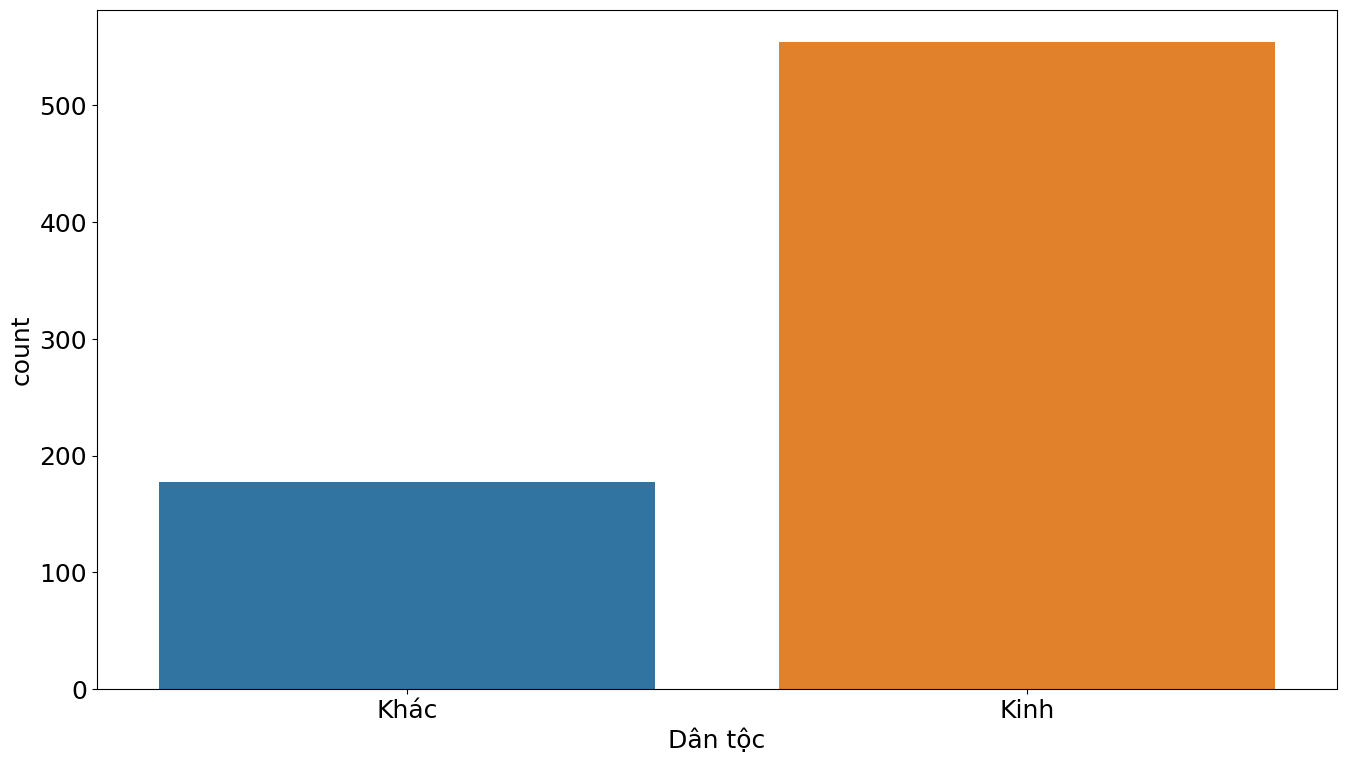

In [12]:
sns.countplot(x ='Dân tộc', data = df)
plt.show()

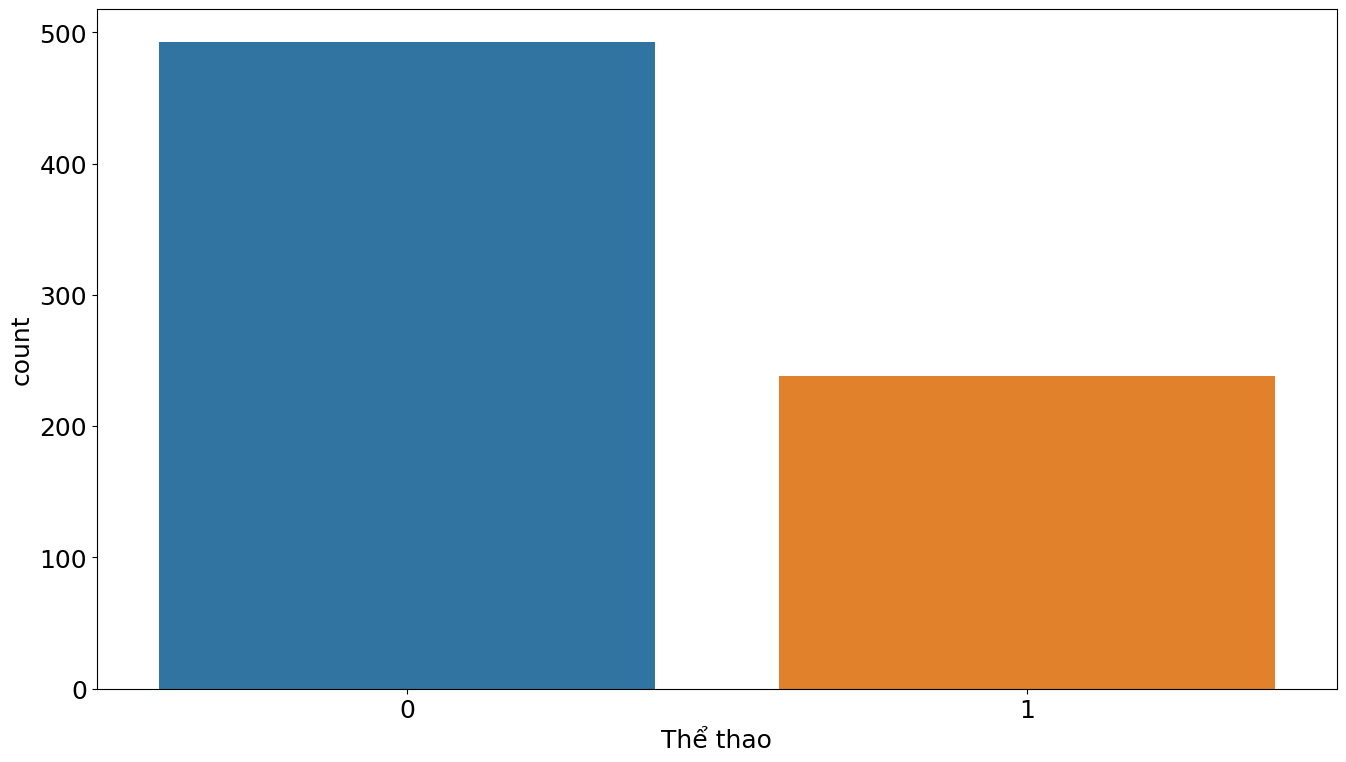

In [13]:
sns.countplot(x ='Thể thao', data = df)
plt.show()

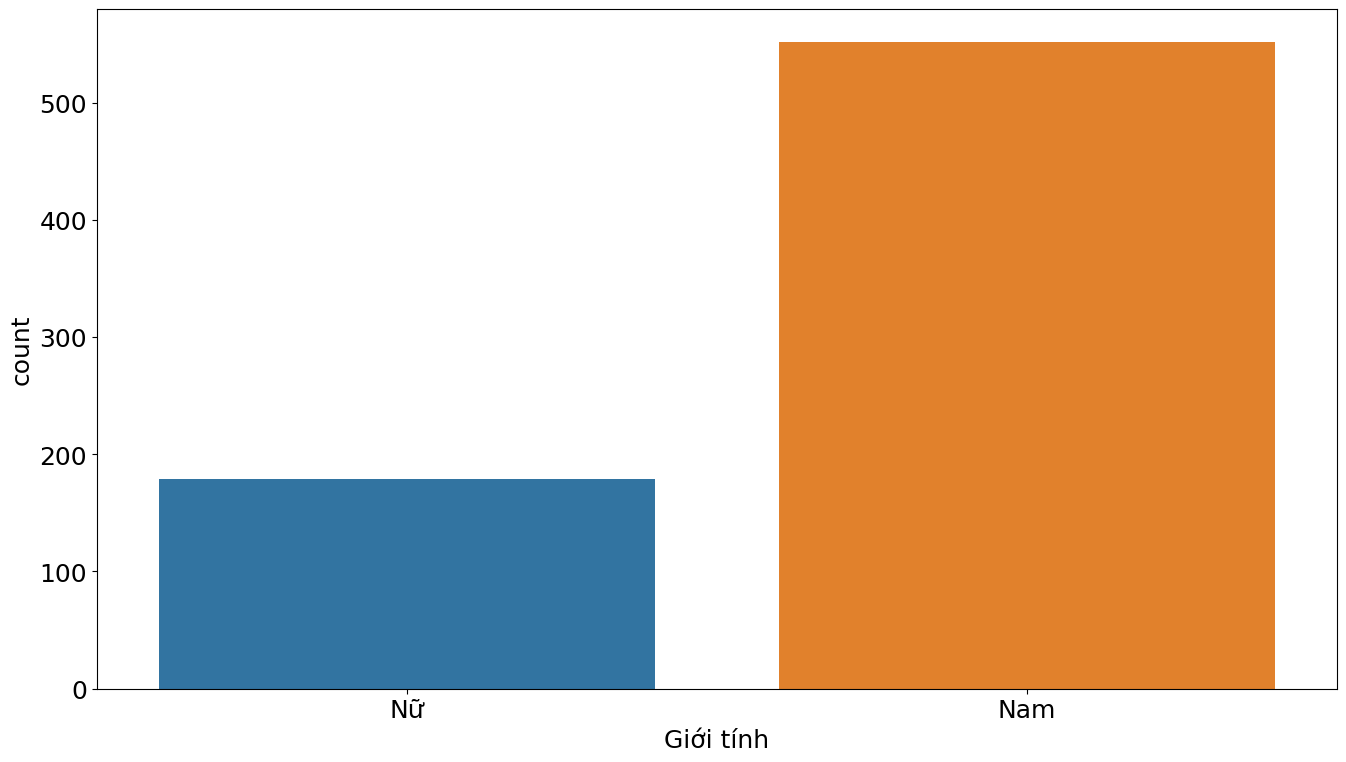

In [14]:
sns.countplot(x ='Giới tính', data = df)
plt.show()

## Biểu đồ Histogram

## Hàm vẽ histogram

In [15]:
def histogram(data, label):
    mean = np.mean(data)
    sigma = np.std(data, ddof = 1)
    x = np.linspace(mean - 3*sigma, mean + 3*sigma)
    plt.plot(x, stats.norm.pdf(x, mean, sigma), color = 'yellow')
    plt.hist(data, density=True, color = 'purple', edgecolor = 'pink')
    plt.title(label = label)
    plt.show()

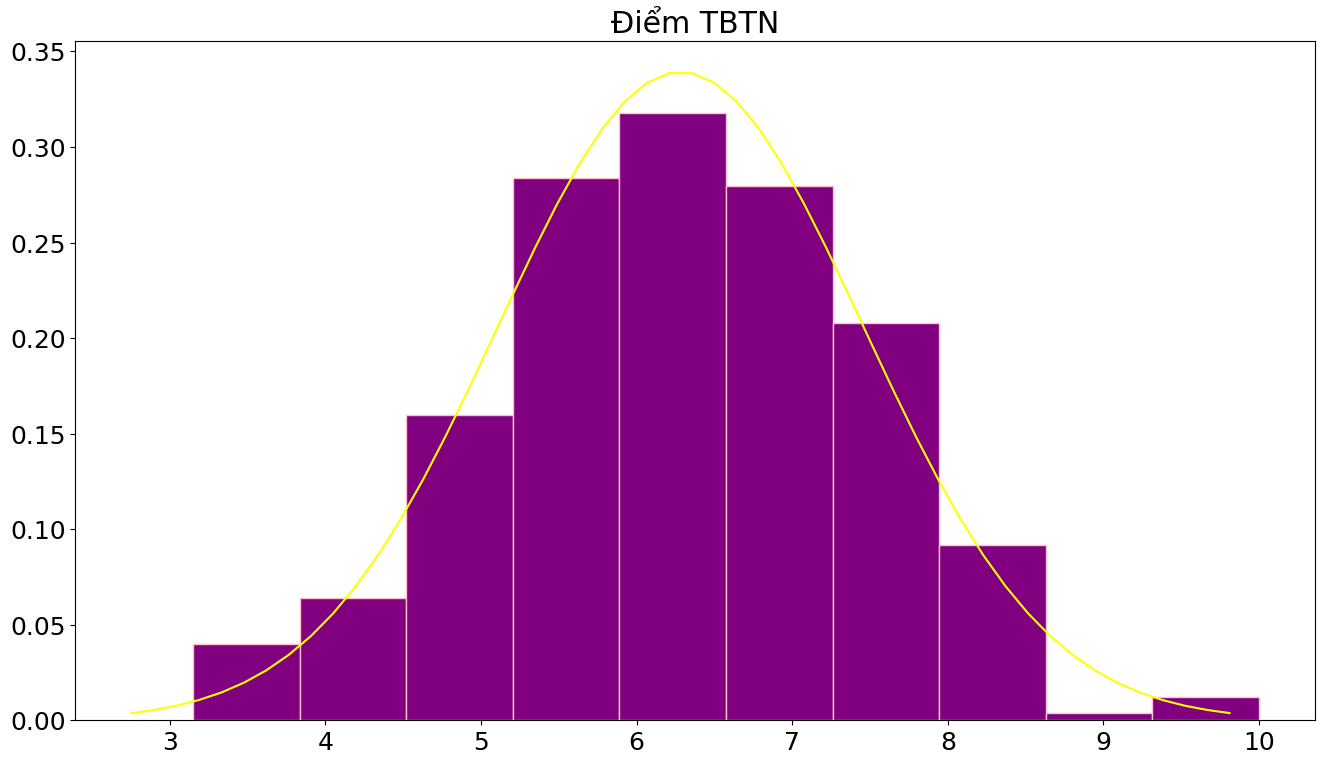

In [16]:
histogram(df['Điểm TBTN'], label = 'Điểm TBTN')

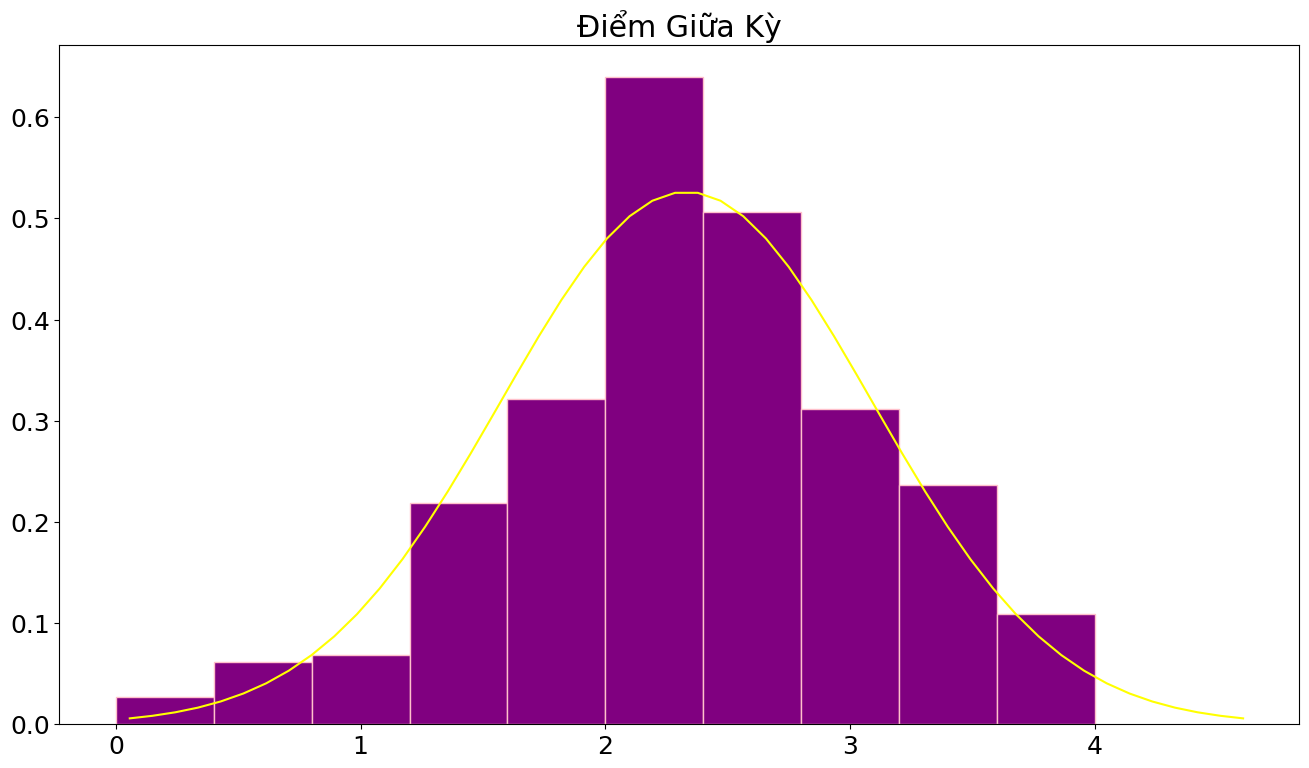

In [17]:
histogram(df['Điểm giữa kỳ'], label = 'Điểm Giữa Kỳ')

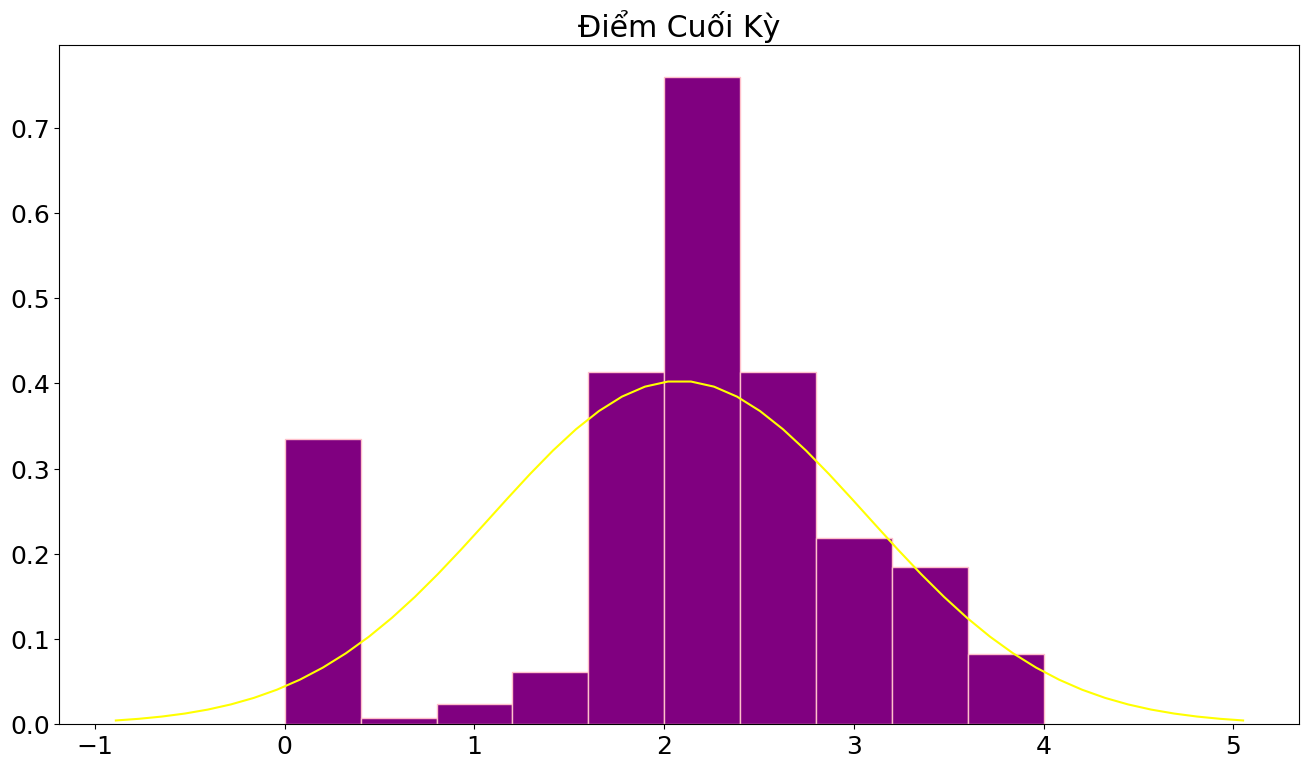

In [18]:
histogram(df['Điểm cuối kỳ'], label = 'Điểm Cuối Kỳ')

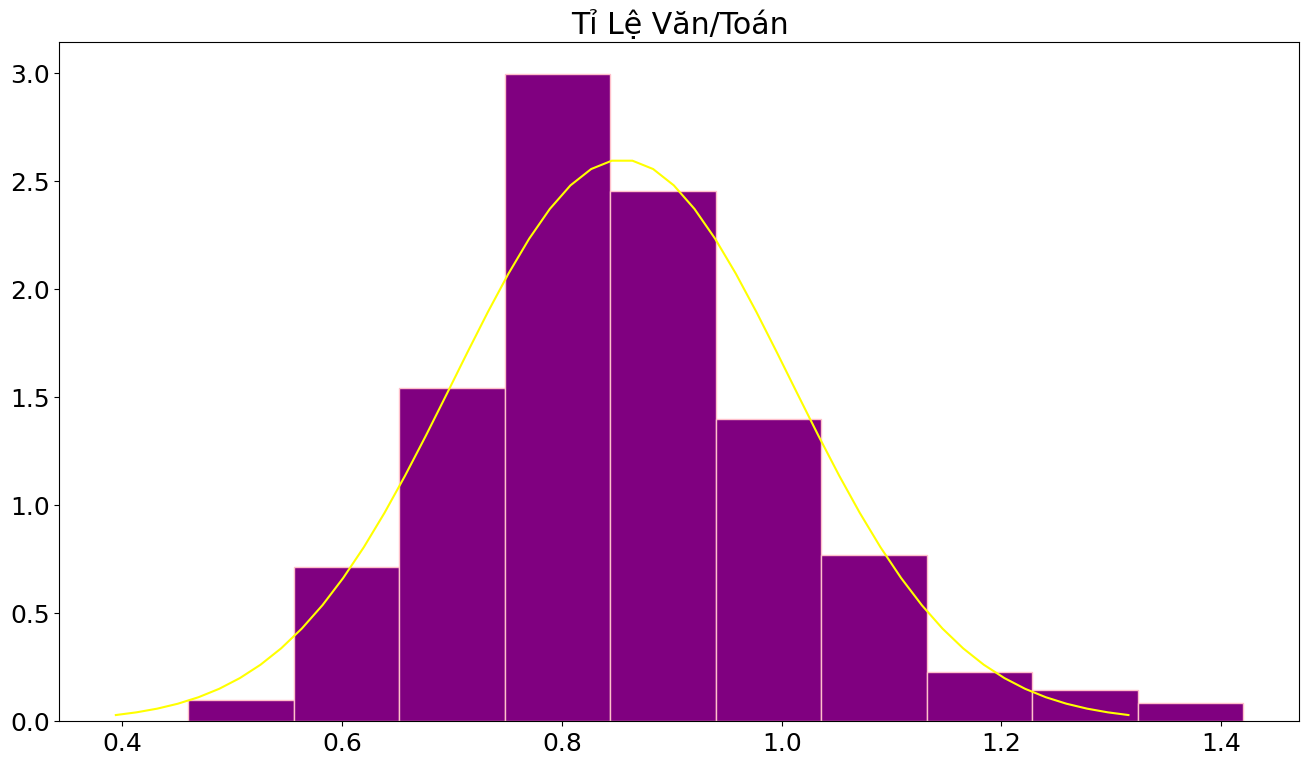

In [19]:
histogram(df['Tỉ lệ Văn/Toán'], label = 'Tỉ Lệ Văn/Toán')

## Câu 3 : Dùng kiểm định T-test với sample ngẫu nhiên (n=30) để so sánh điểm trung bình cuối kỳ của sinh viên theo giới tính; thể thao.

In [20]:
df_random_30 = df.sample(30)

## Phát biểu giả thuyết
$$H_{0}: \text{Có sự khác nhau về điểm trung bình cuối kỳ của sinh viên so với giới tính}$$

$$H_{a}: \text{Không có sự khác nhau về điểm trung bình cuối kỳ của sinh viên so với giới tính}$$

## Điểm cuối kỳ

In [21]:
stat, p_value = stats.ttest_ind(df_random_30['Điểm cuối kỳ'][df_random_30['Giới tính']=='Nam'],
                                df_random_30['Điểm cuối kỳ'][df_random_30['Giới tính']=='Nữ'])
print('Stat =', stat, 'và', 'p_value =', p_value)
if p_value < 0.05:
    print('''Có bằng chứng để bác bỏ giả thuyết H0.Điều này khẳng
          định có sự khác nhau về điểm trung bình cuối kỳ của sinh viên so với giới tính''')
else:
    print('''Chưa có bằng chứng để bác bỏ giả thuyết H0.Điều này
    chưa có thể khẳng định có sự khác nhau về điểm trung bình cuối kỳ của sinh viên so với giới tính''')

Stat = 0.6750079488283816 và p_value = 0.5052069615369085
Chưa có bằng chứng để bác bỏ giả thuyết H0.Điều này
    chưa có thể khẳng định có sự khác nhau về điểm trung bình cuối kỳ của sinh viên so với giới tính


## Thể thao

In [22]:
stats.levene(df_random_30['Điểm cuối kỳ'][df_random_30['Thể thao']==0],
            df_random_30['Điểm cuối kỳ'][df_random_30['Thể thao']==1])
print('p_value =', p_value)
if p_value < 0.05:
    print('''Có sự khác nhau về điểm trung bình đối với các sinh viên chơi thể thao''')
else:
    print('''Không có sự khác nhau về điểm đối với các sinh viên không chơi thể thao''')

p_value = 0.5052069615369085
Không có sự khác nhau về điểm đối với các sinh viên không chơi thể thao


## 4. Dùng kiểm định Chi2 để nghiên cứu sự ảnh hưởng của giới tính đến LetterGrade

In [23]:
time_tu_hoc = [0, 15, 45, 75, 135]
df['StudyHours'] = pd.cut(df['Thời gian tự học'], time_tu_hoc, labels = ['Thấp','Trung bình','Nhiều','Rất nhiều'])

In [24]:
diem_cuoi_ky = [0, 1.0, 1.7, 2.7, 3.7, 4.0]
df['LetterGrade'] = pd.cut(df['Điểm cuối kỳ'], diem_cuoi_ky, labels = ['F', 'D', 'C', 'B', 'A'])

In [25]:
df.sample(15)

,Mã SV,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ,StudyHours,LetterGrade
169,170,6.57,0.47,303,84,Nam,Kinh,1,28,3.50,0,3.14,Trung bình,B
630,631,6.57,0.65,256,58,Nam,Kinh,2,61,2.50,0,2.29,Nhiều,C
587,588,8.25,0.82,771,481,Nam,Kinh,1,0,1.50,0,0.00,NaN,NaN
193,194,3.78,0.93,240,151,Nam,Khác,1,100,2.00,1,2.20,Rất nhiều,C
708,709,5.38,0.92,512,339,Nữ,Kinh,2,12,2.50,0,2.25,Thấp,C
277,278,9.02,0.82,82,45,Nam,Kinh,1,28,3.20,0,2.00,Trung bình,C
646,647,7.27,0.70,172,5,Nam,Kinh,2,74,2.50,1,2.85,Nhiều,B
665,666,6.85,0.96,299,42,Nam,Kinh,1,91,2.25,0,2.19,Rất nhiều,C
668,669,6.92,0.98,425,30,Nữ,Kinh,2,15,2.59,0,3.60,Thấp,B
546,547,7.90,0.69,396,7,Nam,Kinh,2,53,3.57,1,2.81,Nhiều,B


## Hàm kết luận

In [26]:
def ketluan(p, alpha=0.05):
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df

## Phát biểu giả thuyết
$$H_{0}: \text{Không có sự khác nhau về điểm trung bình cuối kỳ của sinh viên so với giới tính}$$

$$H_{1}: \text{Có sự khác nhau về điểm trung bình cuối kỳ của sinh viên so với giới tính}$$

In [27]:
xep_loai = pd.crosstab(index=df['Giới tính'], columns=df['LetterGrade'])
score, p_value, dof, expected = stats.chi2_contingency(xep_loai)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
ketluan(p)

,score,p_value,dof,KetLuan
,65.064935,2.493414e-13,4,Chấp nhận H1 với mức ý nghĩa 0.05


## Câu 5: Có nhận định cho rằng thời gian tự học (StudyHours) có ảnh hưởng đến kết quả LetterGrade.Hãy kiểm chứng nhận định trên (có thể dùng Chi2 test) với mức ý nghĩa 5%.

In [28]:
table_lettergrade = pd.crosstab(index=df['StudyHours'], columns = df['LetterGrade'])
table_lettergrade

LetterGrade,F,D,C,B,A
StudyHours,,,,,
Thấp,3,17,39,16,15
Trung bình,2,9,134,54,4
Nhiều,0,4,127,32,2
Rất nhiều,0,3,124,46,2


## Phát biểu giả thuyết
$$H_{0}: \text{Thời gian tự học không ảnh hưởng đến kết quả LetterGrade}$$

$$H_{1}: \text{Thời gian tự học có ảnh hưởng đến kết quả LetterGrade}$$

In [29]:
score, p_value, dof, expected = stats.chi2_contingency(table_lettergrade)
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
ketluan(p)

,score,p_value,dof,KetLuan
,112.774461,1.688871e-18,12,Chấp nhận H1 với mức ý nghĩa 0.05


## Câu 6: Có nhận định cho rằng điểm kiểm tra giữa kỳ có ảnh hưởng đến điểm thi cuối kỳ. Hãy kiểm chứng nhận xét trên với độ tin cậy 95%.

## Phát biểu giả thuyết
$$H_{0}: \text{Kết quả kiểm tra giữa kỳ không ảnh hưởng điểm thi cuối kỳ}$$

$$H_{1}: \text{Kết quả kiểm tra giữa kỳ có ảnh hưởng điểm thi cuối kỳ}$$

In [30]:
diem_giua_ky = [0, 1.0, 1.7, 2.7, 3.7, 4.0]
df['Midterm_score'] = pd.cut(df['Điểm giữa kỳ'], diem_giua_ky, labels = ['F', 'D', 'C', 'B', 'A'])

## Chạy mô hình kiểm định Anova

In [31]:
df_1 = df[['Midterm_score', 'Điểm cuối kỳ', 'LetterGrade']]
df_1.columns = ['Midterm_score', 'Diemcuoiky', 'LetterGrade']
df_1.sample(10)

,Midterm_score,Diemcuoiky,LetterGrade
348,F,0.76,F
136,D,0.60,F
121,C,0.00,NaN
334,B,2.43,C
266,C,2.76,B
480,D,1.95,C
589,C,1.96,C
452,C,2.61,C
204,C,2.22,C
665,C,2.19,C


In [32]:
model = ols('Diemcuoiky ~ C(Midterm_score)', data=df_1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Midterm_score),69.169041,4.0,19.387829,3.655575e-15
Residual,642.177498,720.0,NaN,NaN


## Kiểm tra các điều kiện cho kiểm định Anova

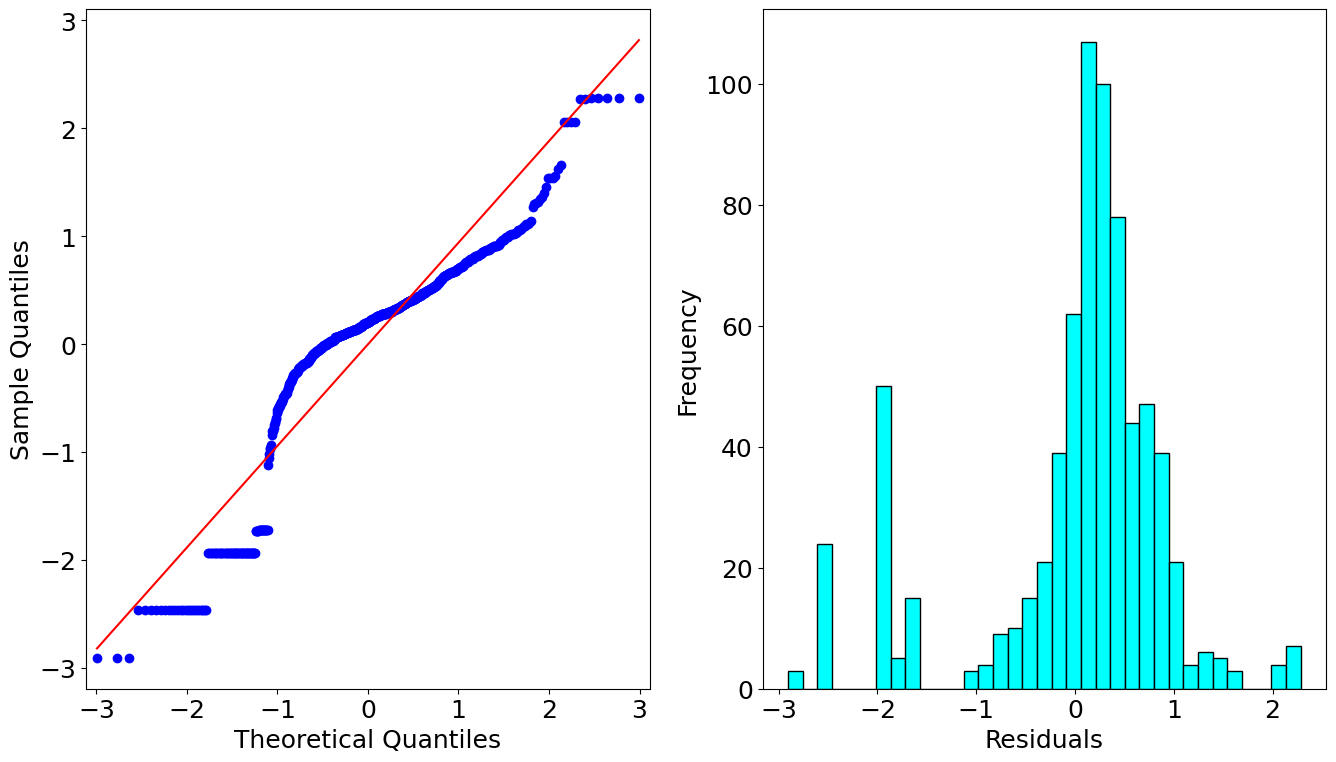

In [33]:
fig, ax = plt.subplots(1, 2)
# model.resid -> các giá trị thặng dư của model: dùng nó để kiểm tra điều kiện cho Anova

sm.qqplot(model.resid, line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k', color = 'cyan') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [34]:
# Sử dụng kiểm định shapiro cho chuẩn/không chuẩn
stats.shapiro(model.resid)

ShapiroResult(statistic=0.863579273223877, pvalue=1.347654077308389e-24)

## Mô tả trực quan hóa cho phần hậu nghiệm

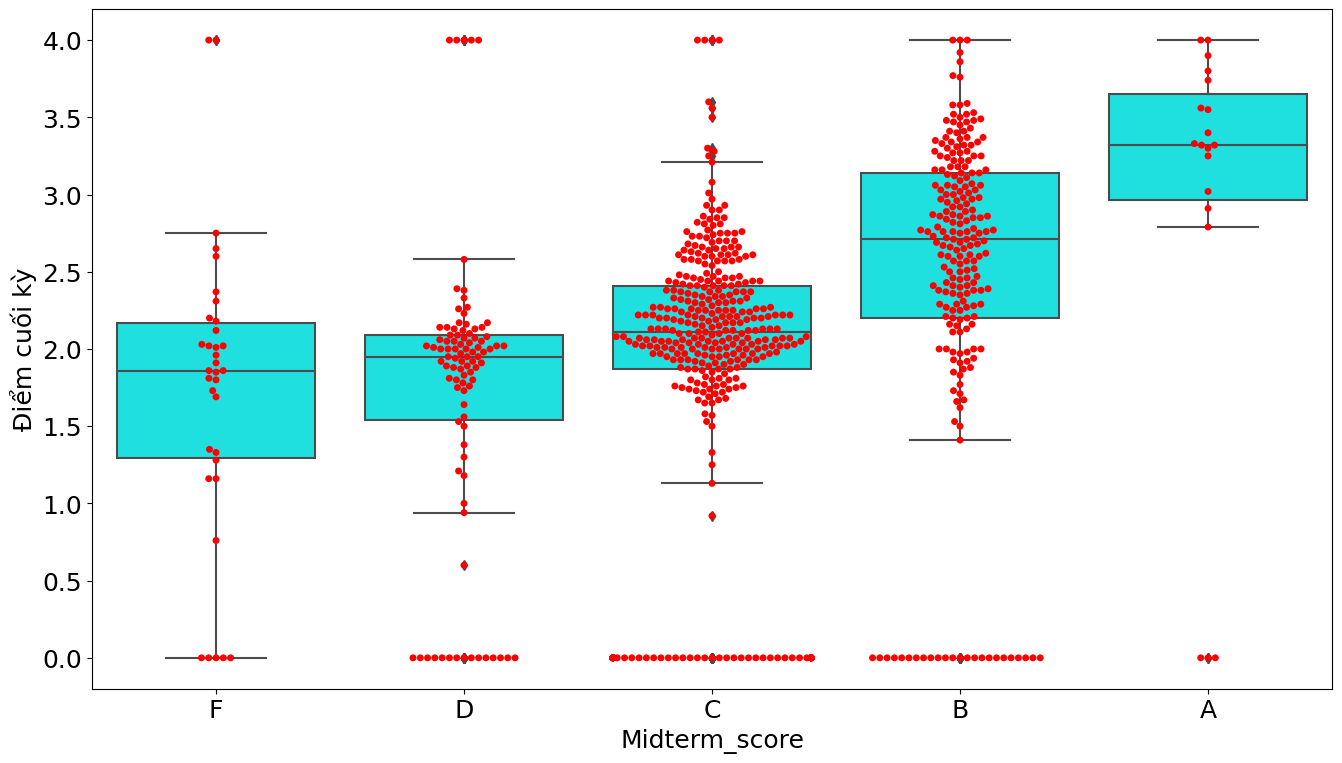

In [35]:
# Kỹ thuật EDA:
sns.boxplot(x='Midterm_score', y='Điểm cuối kỳ', data=df, color='cyan')
sns.swarmplot(x="Midterm_score", y="Điểm cuối kỳ", data=df, color='red')
plt.show()

In [43]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
ketluan(p)

,f_score,p_value,KetLuan
,19.387829,3.655575e-15,Chấp nhận H1 với mức ý nghĩa 0.05


## 7. Tạo một cột nối Giới tính và Dân tộc (ví dụ Nam-Kinh; Nữ-Kinh; Nam-Khác; Nữ Khác) và dùng kiểm định Anova để so sánh điểm trung bình kết thúc học kỳ của các nhóm Giới tính-Dân tộc ở trên.

In [44]:
df['Gioitinhdantoc'] = df.agg('{0[Giới tính]}-{0[Dân tộc]}'.format, axis=1)

In [45]:
df_2 = df[['Điểm cuối kỳ', 'Gioitinhdantoc']]
df_2.columns = ['Diemcuoiky', 'Gioitinhdantoc']
df_2.sample(10)

,Diemcuoiky,Gioitinhdantoc
147,2.01,Nam-Khác
437,1.67,Nam-Khác
275,0.00,Nam-Kinh
666,2.20,Nam-Kinh
150,2.22,Nam-Kinh
209,3.48,Nữ-Kinh
619,2.64,Nam-Khác
515,1.69,Nam-Khác
395,2.08,Nam-Khác
154,1.87,Nam-Kinh


## Chạy mô hình kiểm định Anova

In [48]:
model = ols('Diemcuoiky ~ C(Gioitinhdantoc)', data=df_2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Gioitinhdantoc),28.468563,3.0,10.036177,0.000002
Residual,687.401347,727.0,NaN,NaN


## Kiểm tra các điều kiện cho kiểm định Anova

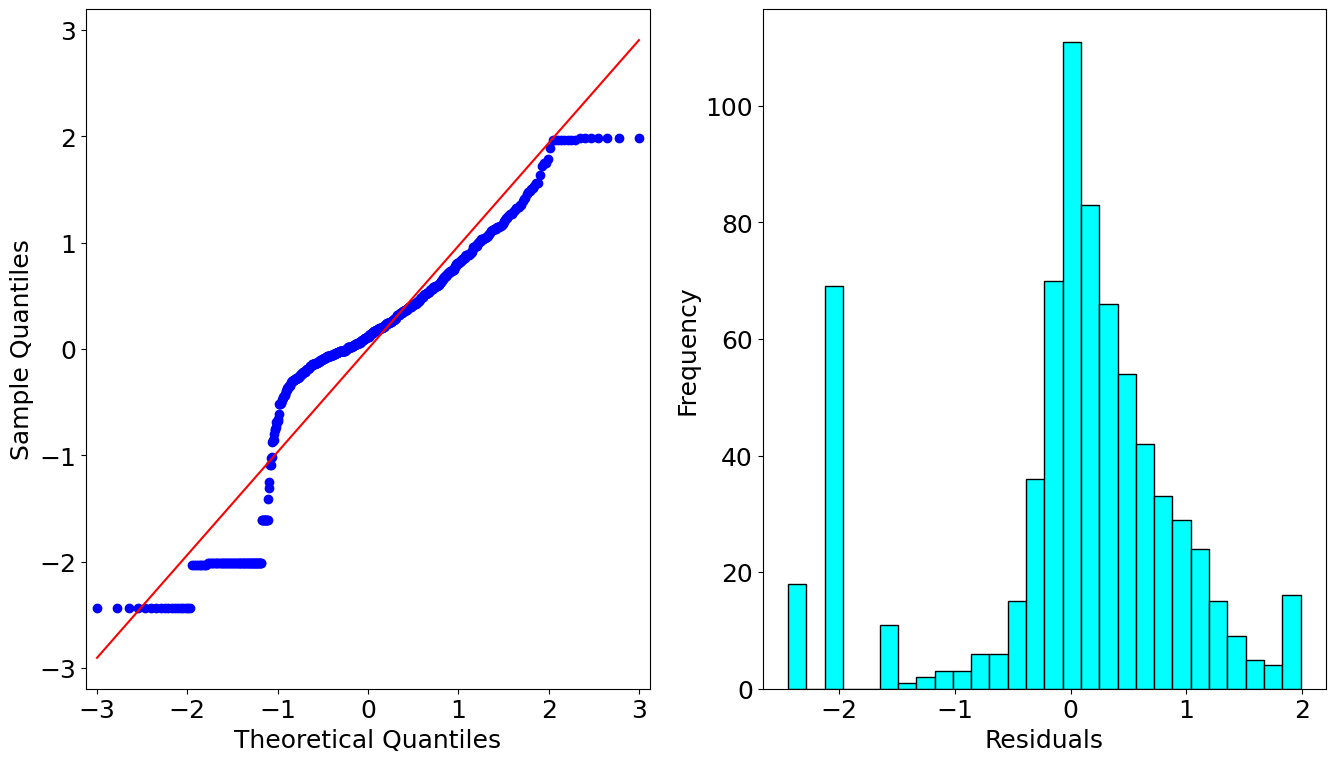

In [49]:
fig, ax = plt.subplots(1, 2)


sm.qqplot(model.resid, line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k', color = 'cyan') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [50]:
# Sử dụng kiểm định shapiro cho chuẩn/không chuẩn
stats.shapiro(model.resid)

ShapiroResult(statistic=0.8952930569648743, pvalue=6.784743491977618e-22)

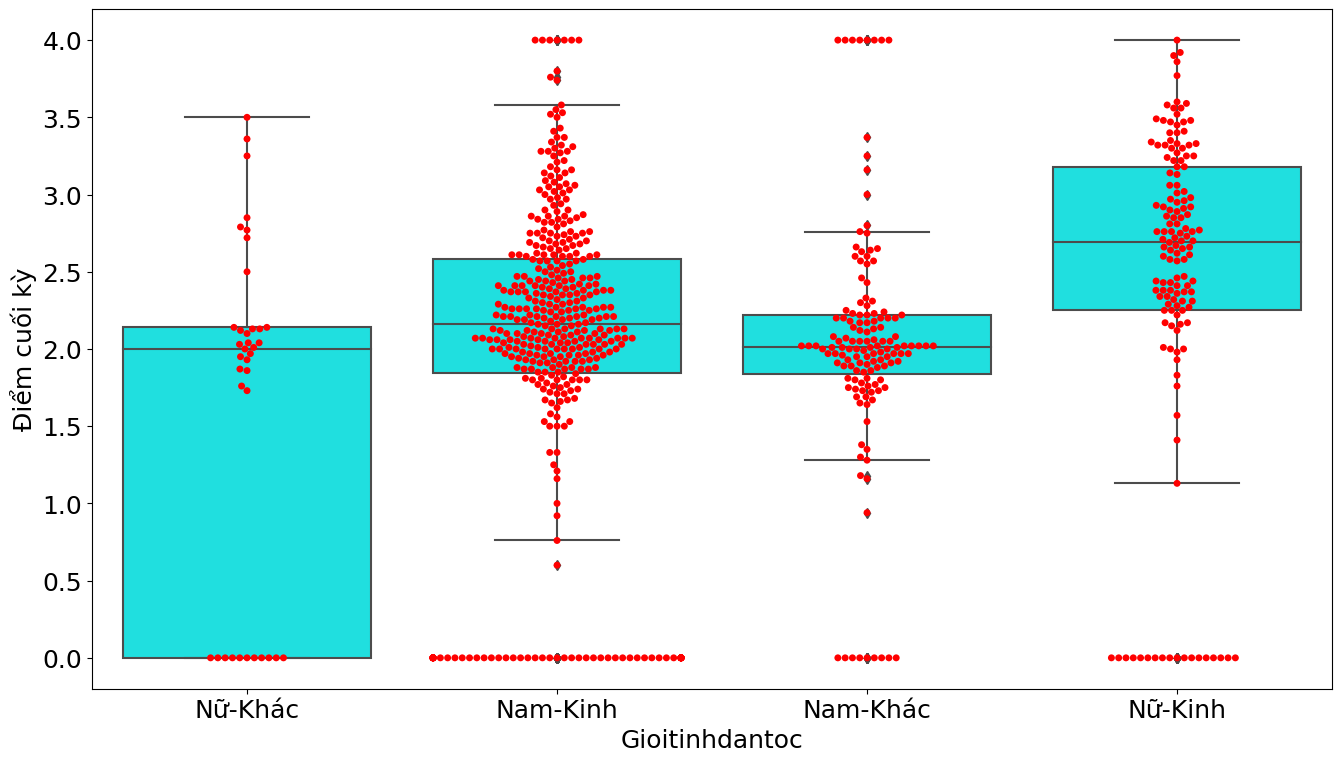

In [51]:
# Kỹ thuật EDA:
sns.boxplot(x='Gioitinhdantoc', y='Điểm cuối kỳ', data=df, color='cyan')
sns.swarmplot(x="Gioitinhdantoc", y="Điểm cuối kỳ", data=df, color='red')
plt.show()